# Single TCR peptide AUC result

In [2]:
import pickle
import pandas as pd
import numpy as np

In [ ]:

with open('/Users/zhangzhiwen/Documents/ERGO-master-test10/pep_test_result_ae2', 'rb') as file:
    data1 = pickle.load(file)


In [ ]:
ls1=[]
for i in data1:
    ls1.append([i[0],i[2]])

In [ ]:
len(data1)

In [ ]:
df_ae = pd.DataFrame(ls1,columns = ['pep','ae_auc'])

In [ ]:
df_ae

In [ ]:
with open('/Users/zhangzhiwen/Documents/ERGO-master-test10/pep_test_result_lstm2', 'rb') as fi:
    data2 = pickle.load(fi)

In [ ]:
len(data2)

In [ ]:
ls2=[]
for i in data2:
    ls2.append([i[0],i[2]])

In [ ]:
df_lstm = pd.DataFrame(ls2,columns = ['pep','lstm_auc'])

In [ ]:
df_lstm

In [ ]:
df_all = pd.merge(df_ae, df_lstm, on = 'pep',how='outer')

In [ ]:
df_all

In [ ]:
df_all['ae_auc']=df_all['ae_auc'].round(4)

In [ ]:
df_all['lstm_auc']=df_all['lstm_auc'].round(4)

In [ ]:
df_all.to_csv('ERGO10_singlepep.csv',index = False)

In [ ]:
df_all

In [ ]:
df10 = pd.read_csv('ERGO10_singlepep.csv')

In [ ]:
df20 = pd.read_csv('ERGO20_singlepep.csv')

In [ ]:
df_test = pd.merge(df10, df20, on = 'pep',how="outer")

In [ ]:
df_test.to_csv('ERGO10and20.csv',index = False)

In [ ]:
df_test

# Training roc curve result

In [3]:
data = np.load('/Users/zhangzhiwen/Documents/ERGO-master-test20/roc_ae2.npz')

In [4]:
data.files

['fpr', 'tpr', 'auc']

In [5]:
data['auc']

array(0.8042237)

In [6]:
data_lstm = np.load('/Users/zhangzhiwen/Documents/ERGO-master-test20/roc_lstm2.npz')

In [7]:
data_lstm['auc']

array(0.90703804)

In [8]:
lstm_fpr=data_lstm['fpr']
lstm_tpr=data_lstm['tpr']
lstm_auc=data_lstm['auc']

In [9]:
ae_fpr=data['fpr']
ae_tpr=data['tpr']
ae_auc=data['auc']

In [10]:
import matplotlib.pyplot as plt

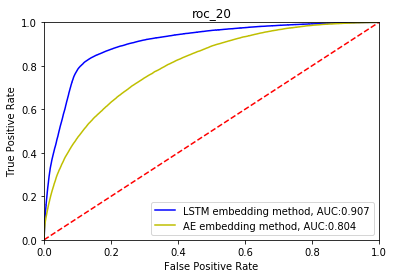

In [11]:
plt.figure
plt.title('roc_20')
plt.plot(lstm_fpr, lstm_tpr, 'b',label='LSTM embedding method, AUC:0.907')
plt.plot(ae_fpr, ae_tpr, 'y',label = 'AE embedding method, AUC:0.804')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [12]:
with open('/Users/zhangzhiwen/Documents/ERGO-master-test20/tpp_test_result_lstm2','rb') as r1:
    tpp_l = pickle.load(r1)

# Single peptide dataset summary

In [ ]:
def loaddata(dirname,trainfile,valfile,testfile):
    with open('/Users/zhangzhiwen/Documents/{0}/{1}'.format(dirname,trainfile),'rb') as fi1:
        tradata = pickle.load(fi1)
    with open('/Users/zhangzhiwen/Documents/{0}/{1}'.format(dirname,valfile),'rb') as fi2:
        valdata = pickle.load(fi2)
    with open('/Users/zhangzhiwen/Documents/{0}/{1}'.format(dirname,testfile),'rb') as fi3:
        testdata = pickle.load(fi3)
    return tradata, valdata, testdata

In [ ]:
def count(ls):
    p=0
    n=0
    peplis=[]
    for i in ls:
        if i[2] == 'p':
            p = p+1
        else:
            n=n+1
        peplis.append(i[1])
    print('p:', p, 'n:', n )
    newpeplis = set(peplis)
    print('number of pep:',len(newpeplis))
    

In [ ]:
def same_elem(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    iset = set1.intersection(set2)
    return list(iset)

In [ ]:
def countpep(ls):
    ls_df = pd.DataFrame(ls,columns = ['tcr','pep'])
    ls_df_pep = list(ls_df['pep'])
    ls_df_d = {t:ls_df_pep.count(t) for t in set(ls_df_pep)}
    sorted_ls_d = sorted(ls_df_d.items(), key=lambda k: k[1],reverse=True)
    return sorted_ls_d

In [ ]:

tra_lstm20, val_lstm20,test_lstm20 = loaddata('ERGO-master-test20','train_data_lstm.pickle','test_data_norepet_lstm20.pickle','realtest_norepet_lstm20.pickle')


In [ ]:
def summary(tra,val,test):
    print('tra',len(tra),count(tra))
    print('val',len(val),count(val))
    print('test',len(test),count(test))

In [ ]:
summary(tra_lstm20,val_lstm20,test_lstm20)

In [ ]:
def divide_negpos(lis):
    neg=[]
    pos=[]
    for ele in lis:
        if ele[2]=='n':
            neg.append([ele[0],''.join(ele[1])])
        else:
            pos.append([ele[0],''.join(ele[1])])
    return pos, neg
            

In [ ]:
def generate_finaldf(ls,column_name,column_num):
    posvalue,negvalue = divide_negpos(ls)
    pos_d = countpep(posvalue)
    neg_d = countpep(negvalue)
    pos_df = pd.DataFrame(pos_d,columns = ['pep','{0} positive pairs_{1}'.format(column_name,column_num)])
    neg_df = pd.DataFrame(neg_d,columns = ['pep','{0} negtive pairs_{1}'.format(column_name,column_num)])
    pn_all = pd.merge(pos_df, neg_df, on = 'pep',how="outer")
    return pn_all

In [ ]:
tra_lstm_df10 = generate_finaldf(tra_lstm10,'train','10')
val_lstm_df10 = generate_finaldf(val_lstm10,'validation','10')
test_lstm_df10 = generate_finaldf(test_lstm10,'test','10')

In [ ]:
data_lstm_all10 = pd.merge(tra_lstm_df10,val_lstm_df10, on = 'pep',how="outer")

In [ ]:
data_lstm_all10 = pd.merge(data_lstm_all10,test_lstm_df10, on = 'pep',how="outer")

In [ ]:
data_lstm_all10.to_csv('lstm10_datasum.csv',index = False)

In [ ]:
tra_ae10, val_ae10,test_ae10 = loaddata('ERGO-master-test10','train_data_ae.pickle','test_data_norepet_ae10.pickle','realtest_norepet_ae10.pickle')



In [ ]:
summary(tra_ae10, val_ae10,test_ae10)

In [ ]:
tra_ae_df10 = generate_finaldf(tra_ae10,'train_ae','10')
val_ae_df10 = generate_finaldf(val_ae10,'validation_ae','10')
test_ae_df10 = generate_finaldf(test_ae10,'test_ae','10')

In [ ]:
data_ae_all10 = pd.merge(tra_ae_df10,val_ae_df10, on = 'pep',how="outer")

In [ ]:
data_ae_all10 = pd.merge(data_ae_all10,test_ae_df10, on = 'pep',how="outer")

In [ ]:
data_ae_all10.to_csv('ae10_datasum.csv',index = False)

In [ ]:
tra_ae20, val_ae20,test_ae20 = loaddata('ERGO-master-test20','train_data_ae.pickle','test_data_norepet_ae20.pickle','realtest_norepet_ae20.pickle')



In [ ]:
summary(tra_ae20, val_ae20,test_ae20)

In [ ]:
tra_ae_df20 = generate_finaldf(tra_ae20,'train_ae','20')
val_ae_df20 = generate_finaldf(val_ae20,'validation_ae','20')
test_ae_df20 = generate_finaldf(test_ae20,'test_ae','20')

In [ ]:
data_ae_all20 = pd.merge(tra_ae_df20,val_ae_df20, on = 'pep',how="outer")

In [ ]:
data_ae_all20 = pd.merge(data_ae_all20,test_ae_df20, on = 'pep',how="outer")

In [ ]:
data_ae_all20.to_csv('ae20_datasum.csv',index = False)

In [ ]:
tra_lstm20, val_lstm20,test_lstm20 = loaddata('ERGO-master-test20','train_data_lstm.pickle','test_data_norepet_lstm20.pickle','realtest_norepet_lstm20.pickle')


In [ ]:
summary(tra_lstm20, val_lstm20,test_lstm20)

In [ ]:
tra_lstm_df20 = generate_finaldf(tra_lstm20,'train_lstm','20')
val_lstm_df20 = generate_finaldf(val_lstm20,'validation_lstm','20')
test_lstm_df20 = generate_finaldf(test_lstm20,'test_lstm','20')

In [ ]:
data_lstm_all20 = pd.merge(tra_lstm_df20,val_lstm_df20, on = 'pep',how="outer")

In [ ]:
data_lstm_all20 = pd.merge(data_lstm_all20,test_lstm_df20, on = 'pep',how="outer")

In [ ]:
data_lstm_all20

In [ ]:
data_lstm_all20.to_csv('lstm20_datasum.csv',index = False)

# Combine result


In [ ]:
dfae10 = pd.read_csv('ae10_datasum.csv')
dflstm10 = pd.read_csv('lstm10_datasum.csv')
dfpepresult10 = pd.read_csv('ERGO10_singlepep.csv')

In [ ]:
pepnum10 = pd.merge(dfae10,dflstm10, on = 'pep',how="outer")

In [ ]:
final10= pd.merge(pepnum10,dfpepresult10, on = 'pep',how="outer")

In [ ]:
final10.to_csv('output10.csv',index = False)

In [ ]:
dfae20 = pd.read_csv('ae20_datasum.csv')
dflstm20 = pd.read_csv('lstm20_datasum.csv')
dfpepresult20 = pd.read_csv('ERGO20_singlepep.csv')

In [ ]:
pepnum20 = pd.merge(dfae20,dflstm20, on = 'pep',how="outer")

In [ ]:
final20= pd.merge(pepnum20,dfpepresult20, on = 'pep',how="outer")

In [ ]:
final20.to_csv('output20.csv',index = False)

# AUC summary with DeepTCR result

In [ ]:
deeptcr10 = pd.read_csv('deeptcrAUC_noVJ10.csv')

In [ ]:
deeptcr20 = pd.read_csv('deeptcrAUC_noVJ20.csv')

In [ ]:
deeptcr10 =deeptcr10.rename(columns ={'Class':'pep','AUC':'AUC_10'})

deeptcr20 =deeptcr20.rename(columns ={'Class':'pep','AUC':'AUC_20'})

In [ ]:
deeptcr20

In [ ]:
df10and20 = pd.read_csv('ERGO10and20.csv')

In [ ]:
final_all= pd.merge(df10and20,deeptcr10, on = 'pep',how="outer")

In [ ]:
final_all = pd.merge(final_all,deeptcr20, on = 'pep',how="outer")

In [ ]:
final_all['AUC_10']=final_all['AUC_10'].round(4)

In [ ]:
final_all['AUC_20']=final_all['AUC_20'].round(4)

In [ ]:
final_all.to_csv('ERGOandDeepTCR_result.csv',index = False)

# Generate plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
auc_result = pd.read_csv('ERGOandDeepTCR_result.csv')

In [4]:
auc_result

,pep,ae_auc_10,lstm_auc_10,ae_auc_20,lstm_auc_20,AUC_10,AUC_20
0,FYLCFLAFL,0.7260,0.7319,0.8262,0.8367,0.6355,0.6779
1,IDFYLCFLAF,0.7080,0.7293,0.8334,0.8151,0.6211,0.6574
2,LLFLVLIML,0.7304,0.7443,0.8131,0.8123,0.6054,0.6575
3,LIDFYLCFL,0.7451,0.7361,0.8007,0.8086,0.6242,0.6574
4,FYLCFLAFLL,0.7497,0.7518,0.8202,0.8396,0.6249,0.6537
...,...,...,...,...,...,...,...
536,IQPGQTFSV,NaN,NaN,NaN,NaN,NaN,0.2755
537,RFDNPVLPF,NaN,NaN,NaN,NaN,NaN,0.3844
538,RVGARKSAPL,NaN,NaN,NaN,NaN,NaN,0.0771
539,SQASSRSSSR,NaN,NaN,NaN,NaN,NaN,0.9077


In [10]:
def getlist(df,column):
    ls = list(df[column])
    ls_clean = [x for x in ls if str(x) != 'nan']
    return ls_clean

In [11]:
lsae10 = getlist(auc_result,'ae_auc_10')

In [14]:
lslstm10 = getlist(auc_result,'lstm_auc_10')

In [15]:
lsae20 = getlist(auc_result,'ae_auc_20')

In [16]:
lslstm20 = getlist(auc_result,'lstm_auc_20')

In [17]:
deeptcr10 = getlist(auc_result,'AUC_10')

In [18]:
deeptcr20 = getlist(auc_result,'AUC_20')

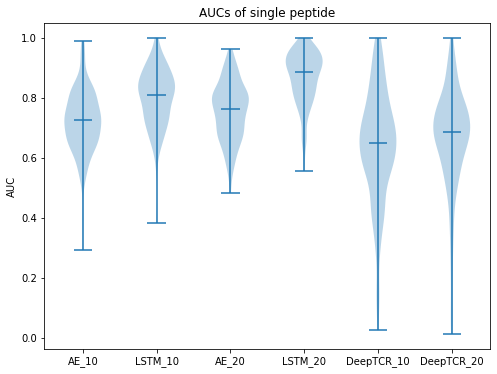

In [35]:
data_to_plot = [lsae10, lslstm10, lsae20, lslstm20, deeptcr10, deeptcr20]
fig, ax = plt.subplots(figsize=(8,6))
ax.violinplot(data_to_plot, showmedians=True)
ax.set_title('AUCs of single peptide')
ax.set_ylabel('AUC')
ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels(['AE_10','LSTM_10','AE_20','LSTM_20','DeepTCR_10','DeepTCR_20'])
plt.show()


In [36]:
output10 = pd.read_csv('output10.csv')

In [37]:
output10

,pep,train_ae positive pairs_10,train_ae negtive pairs_10,validation_ae positive pairs_10,validation_ae negtive pairs_10,test_ae positive pairs_10,test_ae negtive pairs_10,train positive pairs_10,train negtive pairs_10,validation positive pairs_10,validation negtive pairs_10,test positive pairs_10,test negtive pairs_10,ae_auc,lstm_auc
0,LLFLVLIML,2529.0,10885.0,587.0,2175.0,327.0,1301.0,2514.0,10680.0,603.0,2195.0,327.0,1274.0,0.7304,0.7443
1,IDFYLCFLAF,2514.0,10520.0,633.0,2363.0,339.0,1287.0,2520.0,10933.0,624.0,2405.0,339.0,1264.0,0.7080,0.7293
2,FYLCFLAFL,2514.0,10539.0,637.0,2372.0,319.0,1254.0,2539.0,10553.0,616.0,2269.0,319.0,1262.0,0.7260,0.7319
3,LIDFYLCFL,2502.0,11020.0,609.0,2152.0,340.0,1281.0,2496.0,10741.0,612.0,2360.0,340.0,1252.0,0.7451,0.7361
4,MIELSLIDFY,2495.0,10589.0,594.0,2401.0,338.0,1262.0,2465.0,10490.0,627.0,2293.0,338.0,1280.0,0.7474,0.7412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,GTGPEAGLPY,NaN,NaN,1.0,5.0,NaN,NaN,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
528,YVYSRVKNL,NaN,NaN,1.0,10.0,1.0,5.0,1.0,10.0,NaN,NaN,1.0,5.0,NaN,NaN
529,NLSKSLTENK,NaN,NaN,1.0,5.0,1.0,NaN,1.0,10.0,NaN,NaN,1.0,NaN,NaN,NaN
530,AVILRGHLR,NaN,NaN,1.0,10.0,NaN,NaN,1.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
output10_ae = output10[['train_ae positive pairs_10','train_ae negtive pairs_10','ae_auc']].dropna(subset=['ae_auc'])

In [101]:
sum_column = output10_ae["train_ae positive pairs_10"] + output10_ae["train_ae negtive pairs_10"]
output10_ae["aepairs10"] = sum_column
output10_ae = output10_ae[['ae_auc','aepairs10']]
output10_ae = output10_ae.sort_values('aepairs10')

In [138]:
len(output10_ae[output10_ae['ae_auc']>0.8])

43

In [89]:
new10 = output10_ae[output10_ae['aepairs10']<=3000]

In [60]:
output10_lstm = output10[['train positive pairs_10','train negtive pairs_10','lstm_auc']].dropna(subset=['lstm_auc'])

In [104]:
sum_column_lstm = output10_lstm["train positive pairs_10"] + output10_lstm["train negtive pairs_10"]
output10_lstm["lstmpairs10"] = sum_column_lstm
output10_lstm = output10_lstm[['lstm_auc','lstmpairs10']]
output10_lstm = output10_lstm.sort_values('lstmpairs10')

In [136]:
output10_lstm[output10_lstm['lstm_auc']>0.8]

,lstm_auc,lstmpairs10
233,0.8071,318.0
192,0.9591,327.0
201,0.8036,346.0
220,0.8059,364.0
197,0.8917,368.0
...,...,...
18,0.8457,4937.0
24,0.8814,4950.0
14,0.8616,4979.0
17,0.8242,5021.0


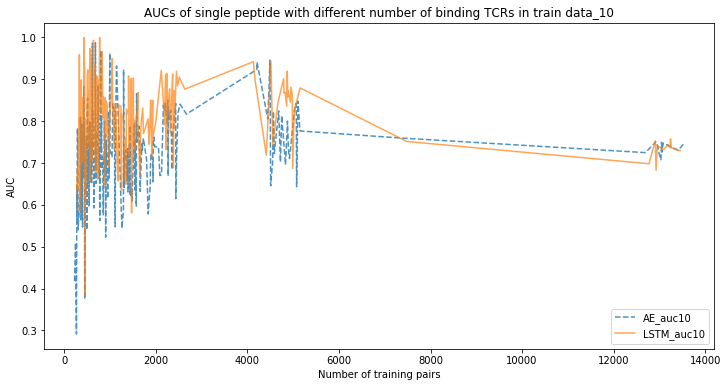

In [145]:

fig, ax = plt.subplots(figsize=(12,6))
line1, = ax.plot(list(output10_ae['aepairs10']), list(output10_ae['ae_auc']), '--', alpha = 0.8, label='AE_auc10')

line2, = ax.plot(list(output10_lstm['lstmpairs10']), list(output10_lstm['lstm_auc']), '-', alpha = 0.7, label='LSTM_auc10')
ax.set_ylabel('AUC')
ax.set_xlabel('Number of training pairs')
ax.set_title('AUCs of single peptide with different number of binding TCRs in train data_10')
ax.legend(loc='lower right')
plt.show()

In [95]:
new10 = new10.sort_values('aepairs10')

In [107]:
output20 = pd.read_csv('output20.csv')

In [108]:
output20

,pep,train_ae positive pairs_20,train_ae negtive pairs_20,validation_ae positive pairs_20,validation_ae negtive pairs_20,test_ae positive pairs_20,test_ae negtive pairs_20,train_lstm positive pairs_20,train_lstm negtive pairs_20,validation_lstm positive pairs_20,validation_lstm negtive pairs_20,test_lstm positive pairs_20,test_lstm negtive pairs_20,ae_auc,lstm_auc
0,MIELSLIDFY,4835.0,18551.0,1121.0,3633.0,633.0,1866.0,4769.0,18203.0,1181.0,3878.0,633.0,1890.0,0.8107,0.8106
1,IELSLIDFYL,4743.0,18561.0,1132.0,3702.0,658.0,1918.0,4681.0,18164.0,1188.0,3776.0,658.0,1953.0,0.8118,0.8135
2,LLFLVLIML,4736.0,18573.0,1145.0,3691.0,631.0,1941.0,4730.0,18256.0,1152.0,3770.0,631.0,1988.0,0.8131,0.8123
3,IDFYLCFLAF,4726.0,18746.0,1198.0,3871.0,577.0,1771.0,4798.0,18703.0,1122.0,3608.0,577.0,1801.0,0.8334,0.8151
4,FYLCFLAFLL,4722.0,18648.0,1134.0,3615.0,621.0,2010.0,4717.0,18558.0,1141.0,3649.0,621.0,1971.0,0.8202,0.8396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,RYRIGNYKL,1.0,10.0,NaN,NaN,1.0,5.0,1.0,10.0,NaN,NaN,1.0,5.0,NaN,NaN
535,TQLNRALTGI,1.0,5.0,1.0,15.0,NaN,NaN,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
536,FRYMNSQGL,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,10.0,NaN,NaN,NaN,NaN
537,IQPGQTFSV,NaN,NaN,1.0,15.0,1.0,5.0,1.0,10.0,NaN,NaN,1.0,5.0,NaN,NaN


In [109]:
output20_ae = output20[['train_ae positive pairs_20','train_ae negtive pairs_20','ae_auc']].dropna(subset=['ae_auc'])

In [111]:
sum_column_20 = output20_ae["train_ae positive pairs_20"] + output20_ae["train_ae negtive pairs_20"]
output20_ae["aepairs20"] = sum_column_20
output20_ae = output20_ae[['ae_auc','aepairs20']]
output20_ae = output20_ae.sort_values('aepairs20')

In [143]:
output20_ae[output20_ae['ae_auc']>0.8]

,ae_auc,aepairs20
322,0.8125,227.0
317,0.9216,230.0
293,0.8106,275.0
265,0.8109,434.0
245,0.8051,516.0
...,...,...
1,0.8118,23304.0
2,0.8131,23309.0
4,0.8202,23370.0
0,0.8107,23386.0


In [113]:
output20_lstm = output20[['train_lstm positive pairs_20','train_lstm negtive pairs_20','lstm_auc']].dropna(subset=['lstm_auc'])

In [114]:
sum_column_lstm20 = output20_lstm["train_lstm positive pairs_20"] + output20_lstm["train_lstm negtive pairs_20"]
output20_lstm["lstmpairs20"] = sum_column_lstm20
output20_lstm = output20_lstm[['lstm_auc','lstmpairs20']]
output20_lstm = output20_lstm.sort_values('lstmpairs20')

In [144]:
output20_lstm[output20_lstm['lstm_auc']>0.8]

,lstm_auc,lstmpairs20
317,0.9804,264.0
296,0.8182,274.0
266,0.9195,316.0
271,0.8655,369.0
265,0.9433,380.0
...,...,...
2,0.8123,22986.0
4,0.8396,23275.0
10,0.8367,23338.0
3,0.8151,23501.0


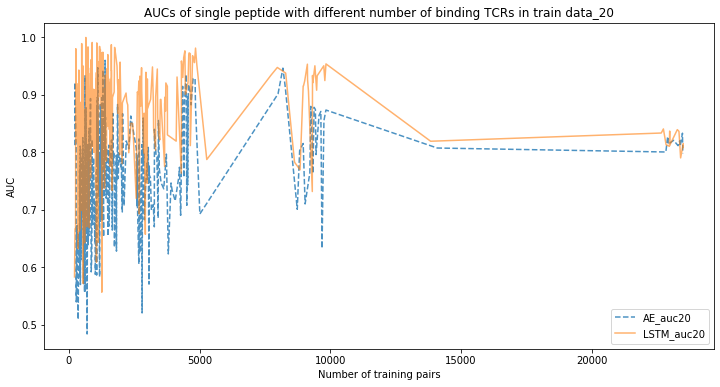

In [146]:

fig, ax = plt.subplots(figsize=(12,6))
line1, = ax.plot(list(output20_ae['aepairs20']), list(output20_ae['ae_auc']), '--', alpha = 0.8, label='AE_auc20')

line2, = ax.plot(list(output20_lstm['lstmpairs20']), list(output20_lstm['lstm_auc']), '-', alpha = 0.6, label='LSTM_auc20')
ax.set_ylabel('AUC')
ax.set_xlabel('Number of training pairs')
ax.set_title('AUCs of single peptide with different number of binding TCRs in train data_20')
ax.legend(loc='lower right')
plt.show()